## **Introduction**

in this analysis, we are are exploring the activity and sleep data for various other brands fitness products to derive insights that will help in improving marketing strategies of Bellabeat(a high-tech company that manufactures health-focused smart products). The focus is on understanding use behavior through various fitness and sleep metrics.


## **1. Data Loading and Preparation**

We begin by loading the required libraries and the datasets provided. We also perform some data cleaning to ensure the datasets are to analysis meanwhile we have eliminated some datasets due to missing data which resulted unreliability.

In [1]:
#Loading the Libraries
library(tidyverse)
library(lubridate)

#Loading datasets
act1<- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
act2<- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### **1.1 Data Cleaning**

We use `lubridate`to handle data formats and perform a full join to combine the datasets and also we handle missing values using the `coalesce()` function.

In [2]:
# Convert dates to correct format
act1 <- act1 %>% mutate(ActivityDate = mdy(ActivityDate))
act2 <- act2 %>% mutate(ActivityDate = mdy(ActivityDate))
sleep <- sleep %>% mutate(SleepDay = mdy_hms(SleepDay))

# Merge activity datasets
act <- full_join(act1, act2, by = c("Id" = "Id", "ActivityDate"))

# Use coalesce to handle missing values after join
act <- act %>%
  mutate(
    Totalsteps = coalesce(TotalSteps.x, TotalSteps.y),
    TotalDistance = coalesce(TotalDistance.x, TotalDistance.y),
    TrackerDistance = coalesce(TrackerDistance.x, TrackerDistance.y),
    VeryActiveDistance = coalesce(VeryActiveDistance.x, VeryActiveDistance.y),
    ModeratelyActiveDistance = coalesce(ModeratelyActiveDistance.x, ModeratelyActiveDistance.y),
    LightActiveDistance = coalesce(LightActiveDistance.x, LightActiveDistance.y),
    SedentaryActiveDistance = coalesce(SedentaryActiveDistance.x, SedentaryActiveDistance.y),
    VeryActiveMinutes = coalesce(VeryActiveMinutes.x, VeryActiveMinutes.y),
    FairlyActiveMinutes = coalesce(FairlyActiveMinutes.x, FairlyActiveMinutes.y),
    LightlyActiveMinutes = coalesce(LightlyActiveMinutes.x, LightlyActiveMinutes.y),
    SedentaryMinutes = coalesce(SedentaryMinutes.x, SedentaryMinutes.y),
    Calories = coalesce(Calories.x, Calories.y)
  ) %>%
  select(Id, ActivityDate, Totalsteps, TotalDistance, TrackerDistance, VeryActiveDistance, 
         ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, 
         VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories)

## **2. Exploratory Data Analysis**

in this section, we explore the distribution of user activity and sleep patterns using various visualizations.

### **2.1 Activity Levels Across Days**
The following bar plot shows the variation of very active minutes throughout the week.


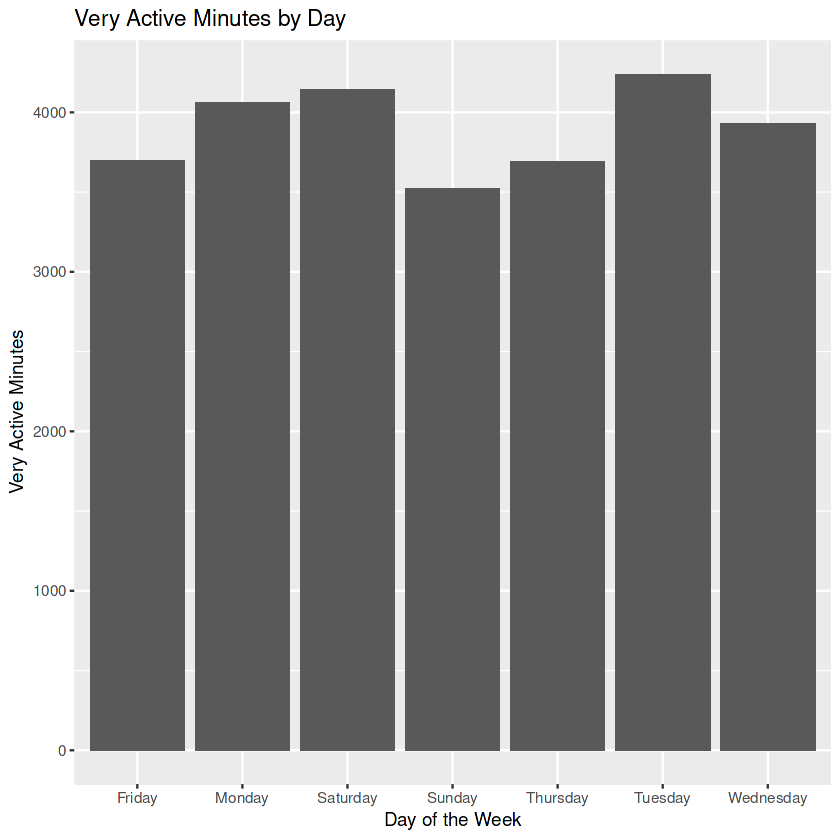

In [3]:
act %>%
  ggplot() +
  geom_bar(mapping = aes(x = weekdays(ActivityDate), y = VeryActiveMinutes), stat = "identity") +
  labs(title = "Very Active Minutes by Day", x = "Day of the Week", y = "Very Active Minutes")

### **2.2 Steps vs. Sedentary Minutes**

The scatter plot below explores the relationship between the number of steps taken and sedentary minutes.

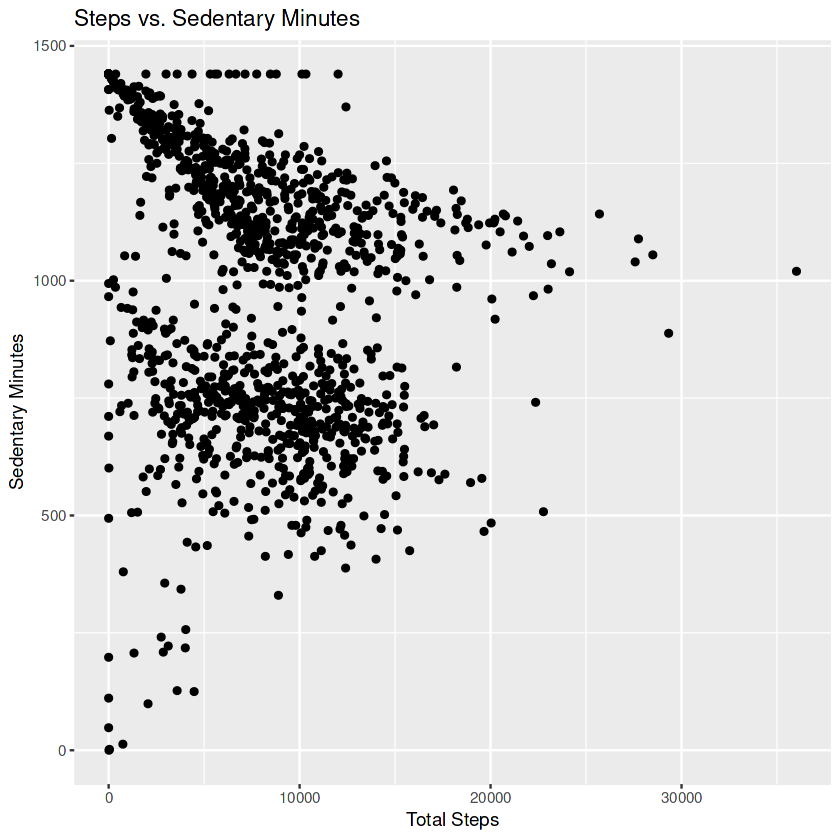

In [4]:
act %>%
  ggplot() +
  geom_point(mapping = aes(x = Totalsteps, y = SedentaryMinutes)) +
  labs(title = "Steps vs. Sedentary Minutes", x = "Total Steps", y = "Sedentary Minutes")

### **2.3 Sleep Data Analysis**

This scatter plot visualizes the relationship between total time in bed and total minutes asleep.


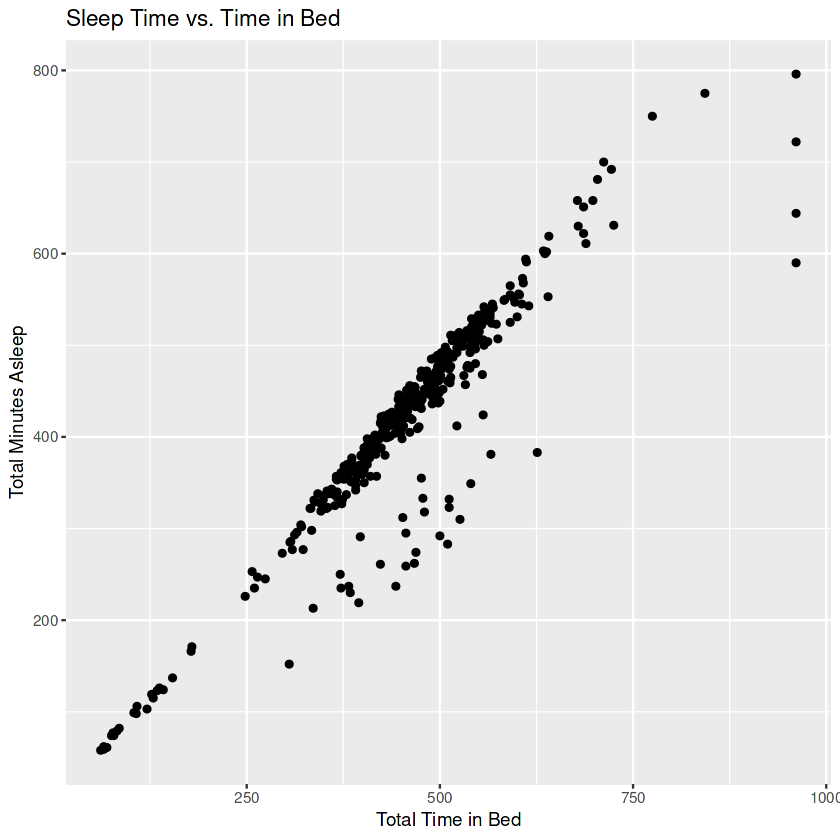

In [5]:
sleep %>%
  ggplot() +
  geom_point(mapping = aes(x = TotalTimeInBed, y = TotalMinutesAsleep)) +
  labs(title = "Sleep Time vs. Time in Bed", x = "Total Time in Bed", y = "Total Minutes Asleep")


## **3. Activity Breakdown**

We calculate the proportion of time spent in different acitivity levels and display it using pie chart.

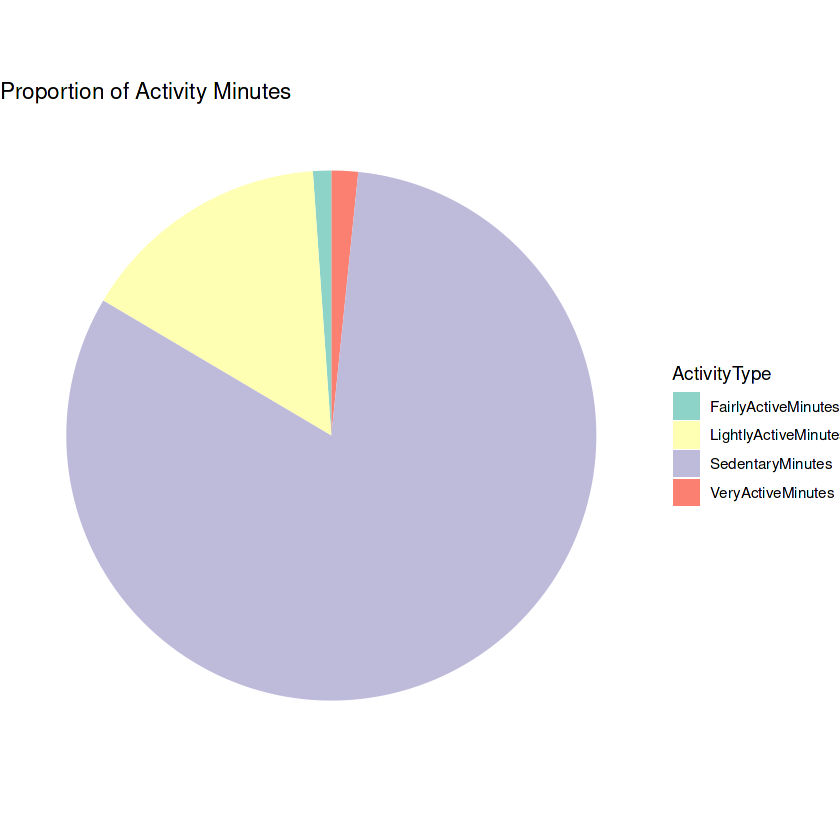

In [6]:
# Summarize activity data
activity_summary <- act %>%
  summarise(
    VeryActiveMinutes = sum(VeryActiveMinutes, na.rm = TRUE),
    FairlyActiveMinutes = sum(FairlyActiveMinutes, na.rm = TRUE),
    LightlyActiveMinutes = sum(LightlyActiveMinutes, na.rm = TRUE),
    SedentaryMinutes = sum(SedentaryMinutes, na.rm = TRUE)
  )

# Convert to long format for pie chart
activity_long <- gather(activity_summary, ActivityType, Minutes, VeryActiveMinutes:SedentaryMinutes)

# Create pie chart
ggplot(activity_long, aes(x = "", y = Minutes, fill = ActivityType)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Proportion of Activity Minutes", x = NULL, y = NULL) +
  theme_void() +
  scale_fill_brewer(palette = "Set3")

## **4. Insights**

* The majority users are more sedentary, suggesting that the Bellabeat marketing strategy can focus on promoting small, manageable goals for increasing physical physical activity.

* People tend to have more very active weekdays like Tuesday and Saturday

* Sleep data reveals that some users spend more time in bed than they do sleeping, which could indicate stress in few number of users also a direct correlation between time on bed and sleep.

## **5. Recommendations**

* **Encourage More Active Lifestyles**: Campaigns focusing on increasing activity levels could engage users who are currently sedentary.

* **Promote Stress-Relieving Products**: Since there's a disparity between sleep and time in bed, stress-relieving features of Bellabeat's products could be marketed to improve the sleep quality.

* **Segment-Based Marketing**: Based in user activity patterns we can conclude that majority of users are working professionals so personalized marketing strategies can be employed to enagte different user segments.

* **Promote GO-TO-BED Reminders**: The sleep data shows a direct correlation between sleep time and time in bed so we should focus on sending notification/bed-time-reminders to encourage users to sleep.